In [2]:
#pip install statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
data = pd.read_csv('./data/train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Handling the missing number
Filling the missing number with mode

In [7]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [8]:

data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])
data['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [9]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [10]:
#Filling the missing number with mode
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])
data['Product_Category_3'].unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

#### Handling Categorical features

In [11]:
cate_feat = [feat for feat in data.columns if data[feat].dtype == 'O' ]
cate_feat

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [12]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [13]:
#Handling gender feature
data['Gender'] = data['Gender'].map({'F' : 0, 'M': 1})
data['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64

In [14]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
data['Age']= data['Age'].map({'0-17' : 1, 
                 '18-25': 2, 
                 '26-35': 3,
                 '36-45': 4,
                 '46-50': 5,
                 '51-55': 6,
                 '55+': 7})

In [16]:
data['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [17]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
data['Stay_In_Current_City_Years']= data['Stay_In_Current_City_Years'].str.replace('4+', '4').astype(int)
data['Stay_In_Current_City_Years']


0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int32

In [19]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [20]:
city_cat= pd.get_dummies(data['City_Category'], drop_first=True).astype(int)
city_cat

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [21]:
df = pd.concat([data, city_cat], axis=1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,B,1,1,20,8.0,16.0,368,1,0
550064,1006035,P00375436,0,3,1,C,3,0,20,8.0,16.0,371,0,1
550065,1006036,P00375436,0,3,15,B,4,1,20,8.0,16.0,137,1,0
550066,1006038,P00375436,0,7,1,C,2,0,20,8.0,16.0,365,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  B                           550068 non-null  int32  
 13  C             

#### Removing Unwanted Columns

In [23]:
df.drop_duplicates()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,B,1,1,20,8.0,16.0,368,1,0
550064,1006035,P00375436,0,3,1,C,3,0,20,8.0,16.0,371,0,1
550065,1006036,P00375436,0,3,15,B,4,1,20,8.0,16.0,137,1,0
550066,1006038,P00375436,0,7,1,C,2,0,20,8.0,16.0,365,0,1


In [24]:
df.drop(columns=['User_ID','Product_ID','City_Category'], inplace=True)
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368,1,0
550064,0,3,1,3,0,20,8.0,16.0,371,0,1
550065,0,3,15,4,1,20,8.0,16.0,137,1,0
550066,0,7,1,2,0,20,8.0,16.0,365,0,1


In [25]:
df.describe()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,3.496430,8.076707,1.858418,0.409653,5.404270,9.260768,14.989567,9263.968713,0.420263,0.311189
std,0.431205,1.353632,6.522660,1.289443,0.491770,3.936211,4.294093,2.739846,5023.065394,0.493601,0.462980
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000,0.000000,0.000000
50%,1.000000,3.000000,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000,0.000000,0.000000
75%,1.000000,4.000000,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000,1.000000,1.000000
max,1.000000,7.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000


In [26]:
df.corr()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
Gender,1.000000,-0.004262,0.117291,0.014660,-0.011603,-0.045594,-0.012445,-0.006003,0.060346,-0.006155,-0.000426
Age,-0.004262,1.000000,0.091463,-0.004712,0.311738,0.061197,0.041075,0.037073,0.015839,-0.017950,0.110616
Occupation,0.117291,0.091463,1.000000,0.030005,0.024280,-0.007618,0.001566,0.000246,0.020833,-0.011673,0.034529
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,1.000000,-0.012819,-0.004213,-0.000748,0.000016,0.005422,0.011008,0.010507
Marital_Status,-0.011603,0.311738,0.024280,-0.012819,1.000000,0.019888,0.010260,0.013978,-0.000463,-0.001863,0.033661
Product_Category_1,-0.045594,0.061197,-0.007618,-0.004213,0.019888,1.000000,0.279247,0.317944,-0.343703,-0.006076,-0.008554
Product_Category_2,-0.012445,0.041075,0.001566,-0.000748,0.010260,0.279247,1.000000,0.463188,-0.128651,-0.003020,-0.001224
Product_Category_3,-0.006003,0.037073,0.000246,0.000016,0.013978,0.317944,0.463188,1.000000,-0.185945,0.004314,-0.020910
Purchase,0.060346,0.015839,0.020833,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000,-0.019098,0.061012
B,-0.006155,-0.017950,-0.011673,0.011008,-0.001863,-0.006076,-0.003020,0.004314,-0.019098,1.000000,-0.572277


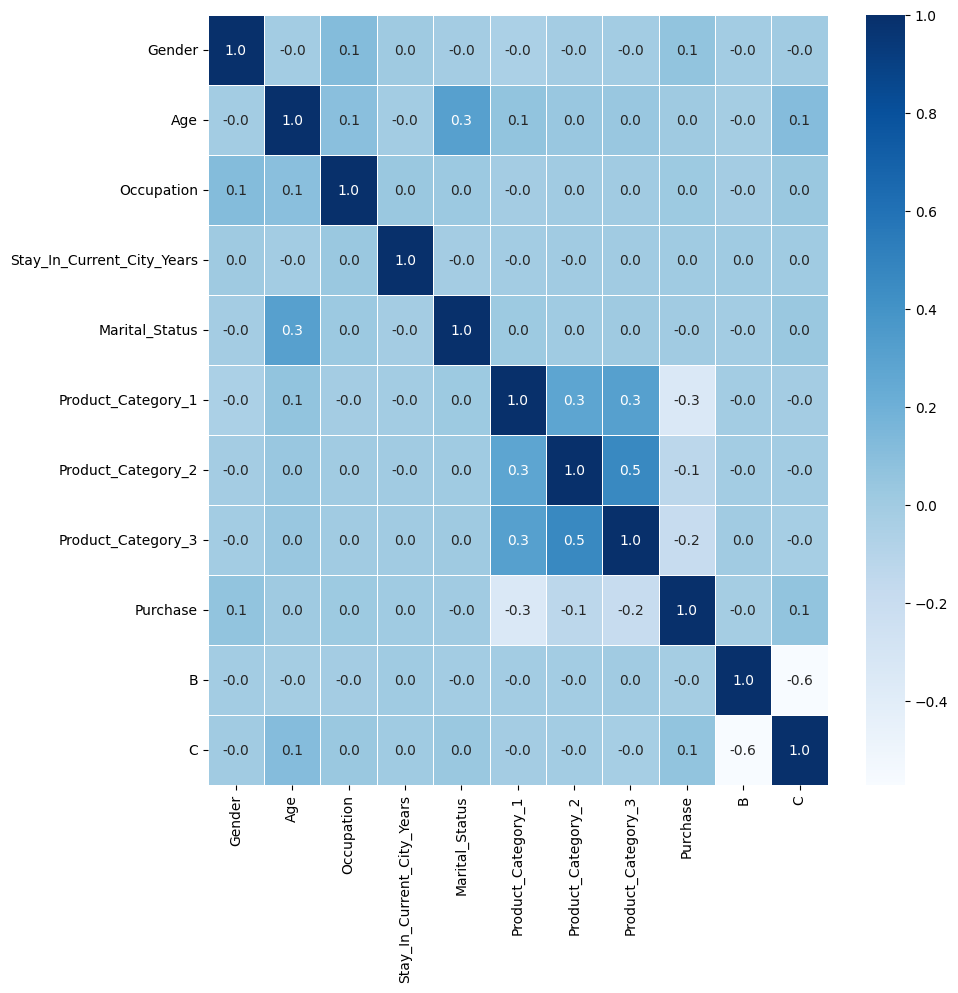

In [27]:
#correlation map
figure, ax = plt.subplots(figsize= (10, 10))
sns.heatmap(df.corr(), linewidths=0.5, cmap='Blues', annot=True, fmt='.1f', ax=ax)
plt.show()

#### Training the Model

In [28]:
#loading the independent variables
X = df.drop('Purchase', axis =1)
X

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,1,0
550064,0,3,1,3,0,20,8.0,16.0,0,1
550065,0,3,15,4,1,20,8.0,16.0,1,0
550066,0,7,1,2,0,20,8.0,16.0,0,1


In [29]:
#Loading the dependent/target variable
y= df['Purchase']
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [30]:
# Spliting the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(385047, 10)

In [31]:
X_test.shape

(165021, 10)

In [32]:
#feature scaling
sc=StandardScaler()
X_train_scaled =sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)
X_train_scaled

array([[ 0.57162531, -0.36693322,  1.21508142, ...,  0.36881237,
        -0.85069198, -0.67262255],
       [ 0.57162531, -0.36693322, -1.08479527, ...,  0.36881237,
         1.17551361, -0.67262255],
       [ 0.57162531, -1.1051074 , -0.1648446 , ...,  0.36881237,
        -0.85069198, -0.67262255],
       ...,
       [-1.74939769, -1.1051074 , -1.08479527, ...,  0.36881237,
         1.17551361, -0.67262255],
       [-1.74939769, -1.1051074 , -0.62481993, ...,  0.36881237,
         1.17551361, -0.67262255],
       [-1.74939769, -1.1051074 , -0.93147016, ...,  0.36881237,
        -0.85069198, -0.67262255]])

## Models

In [33]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)

In [34]:
#model A Linear Regression
lr = LinearRegression()
model_lr = lr.fit(X_train_scaled, y_train)
pred= model_lr.predict(X_test_scaled)
pred

array([11817.60519671, 10475.00229254,  7366.15201815, ...,
       11292.3914949 , 10465.94638941,  9092.37459695])

In [35]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(comparison.head(10))

        Actual     Predicted
84432    19142  11817.605197
72724    15513  10475.002293
197032    7802   7366.152018
353704   15455  10569.200738
91198     4492   8677.834281
263977    6965   8960.067033
340456    8763   9112.441244
24094    19347  10568.076297
157277    7017  10054.341157
531759   15594  11041.363327


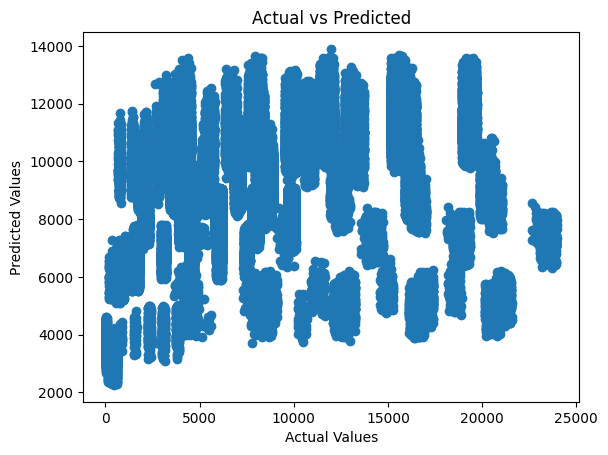

In [36]:
# Plot Actual vs Predicted
plt.scatter(y_test, pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [38]:
# Model B DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model_dtr = dtr.fit(X_train_scaled, y_train)
pred_2 = model_dtr.predict(X_test_scaled)
pred_2

array([17377.        , 19245.        ,  5670.        , ...,
       13750.5       , 14421.8       ,  6213.22641509])

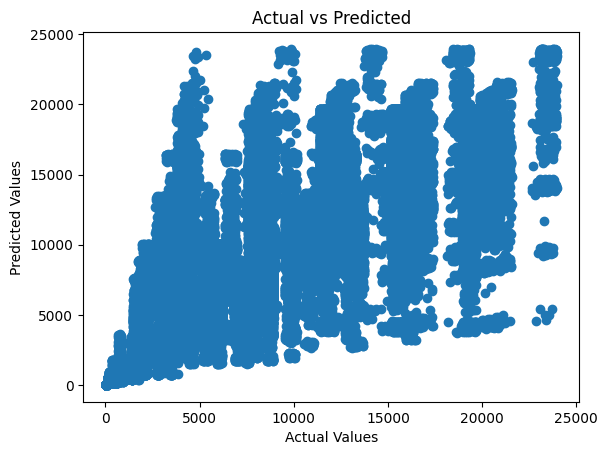

In [45]:
plt.scatter(y_test, pred_2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [39]:
# Model C RandomForest Regessor
import time
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
start = time.time()
model_rfr = rfr.fit(X_train_scaled, y_train)
end = time.time()
pred_3 = model_rfr.predict(X_test_scaled)
pred_3

array([13658.83544444, 14666.93519892,  6809.43858153, ...,
       13841.9295    , 14441.17780556,  6199.24676746])

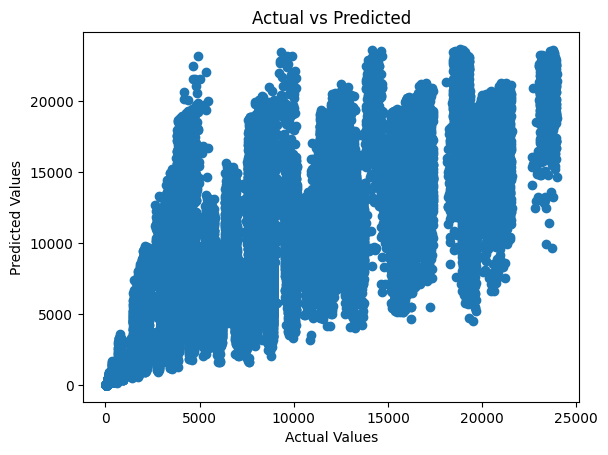

In [44]:
plt.scatter(y_test, pred_3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [40]:
print('Time: ', end - start, 'seconds')

Time:  228.89809656143188 seconds


Linear Regression Metrics Calculation:
MSE = 21944298.789887924, MAE =3577.432786241114, RSME = 4684.474227689584, R2 =0.12927310647633372
Decision Tree regressor Metrics Calculation:
MSE = 11089676.27652206, MAE =2357.760538409033, RSME = 3330.1165559965107, R2 =0.5599732091285261
Random Forest Regressor Metrics Calculation:
MSE = 9330482.399556672, MAE =2224.0096960047426, RSME = 3054.583834101901, R2 =0.6297761877637688


#### Using Advanced Models XGboost and LightGBM

In [ ]:
#pip install xgboost lightgbm

In [58]:
import xgboost as xgb

In [60]:
#initialising the XGBoost Regressor
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=6, random_state=42)
# Train the model
xgb_model.fit(X_train_scaled, y_train)

#prediction
pred_4 = xgb_model.predict(X_test_scaled)
pred_4

array([14860.419, 13480.365,  7284.506, ..., 12710.837, 10708.635,
        6170.794], dtype=float32)

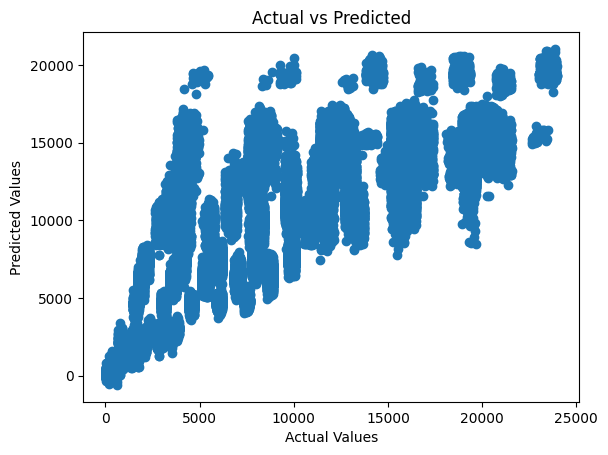

In [80]:
plt.scatter(y_test, pred_4)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [64]:
import lightgbm as lgbm
lgbm_model =lgbm.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
lgbm_model.fit(X_train_scaled, y_train)
pred_5 = lgbm_model.predict(X_test_scaled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 385047, number of used features: 10
[LightGBM] [Info] Start training from score 9261.584983


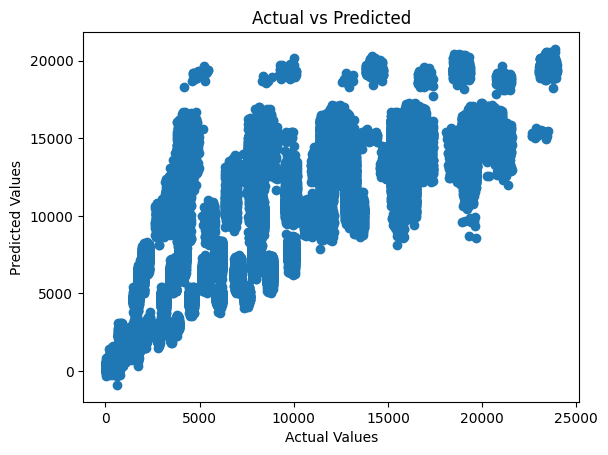

In [81]:
plt.scatter(y_test, pred_5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

### Model Merics Evaluation

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def metrics_cal(y_pred):
    mae_A =mean_absolute_error(y_test, y_pred)
    mse_A =mean_squared_error(y_test , y_pred)
    rsme = np.sqrt(mse_A)
    r2_A =r2_score(y_test, y_pred)
    print(f'MSE = {mse_A}, MAE ={mae_A}, RSME = {rsme}, R2 ={r2_A}')

In [79]:
print('Linear Regression Metrics Calculation:')
metrics_cal(pred)
print('Decision Tree regressor Metrics Calculation:')
metrics_cal(pred_2)
print('Random Forest Regressor Metrics Calculation:')
metrics_cal(pred_3)
print('XGBOOST Metric calculaion')
metrics_cal(pred_4)
print('LightGBM Metric calculaion')
metrics_cal(pred_5)

Linear Regression Metrics Calculation:
MSE = 21944298.789887924, MAE =3577.432786241114, RSME = 4684.474227689584, R2 =0.12927310647633372
Decision Tree regressor Metrics Calculation:
MSE = 11089676.27652206, MAE =2357.760538409033, RSME = 3330.1165559965107, R2 =0.5599732091285261
Random Forest Regressor Metrics Calculation:
MSE = 9330482.399556672, MAE =2224.0096960047426, RSME = 3054.583834101901, R2 =0.6297761877637688
XGBOOST Metric calculaion
MSE = 8574716.947696125, MAE =2198.248192654478, RSME = 2928.261762154491, R2 =0.6597641728177402
LightGBM Metric calculaion
MSE = 8624363.861532198, MAE =2207.443110247683, RSME = 2936.726725715588, R2 =0.6577942350461382


### Insight
XGBoost slightly outperforms all models in terms of R² and error metrics, making it the best model in this case for the sales analysis task.
LightGBM offers a close alternative to XGBoost with similar performance.
Random Forest is also competitive but performs a bit worse than the gradient boosting models.
Linear Regression performs poorly, while Decision Tree performs moderately but lacks the generalization power of ensemble models.

In [67]:
comparison = pd.DataFrame({'Actual': y_test, 'LR_Predicted': pred, 'DT_Predicted': pred_2, 'RFR_Predicted': pred_3, 'XGB_Predict': pred_4, 'LGBM': pred_5})
print(comparison.head(10))

        Actual  LR_Predicted  DT_Predicted  RFR_Predicted   XGB_Predict  \
84432    19142  11817.605197  17377.000000   13658.835444  14860.418945   
72724    15513  10475.002293  19245.000000   14666.935199  13480.365234   
197032    7802   7366.152018   5670.000000    6809.438582   7284.505859   
353704   15455  10569.200738  13831.891892   13818.634937  13161.466797   
91198     4492   8677.834281  15091.956522   15116.630310  15831.309570   
263977    6965   8960.067033   5572.666667    5584.643708   6312.916504   
340456    8763   9112.441244   4621.222222    4625.913434   6017.208008   
24094    19347  10568.076297  15668.240000   15556.151340  13073.552734   
157277    7017  10054.341157   4928.750000    4829.420111   6496.651367   
531759   15594  11041.363327  11770.500000   11364.293560  12584.624023   

                LGBM  
84432   14762.026222  
72724   13530.049898  
197032   7319.053081  
353704  13158.783383  
91198   15648.175545  
263977   6139.893409  
340456   6010

In [77]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid_xgb ={
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth':[2, 8, 20]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train_scaled, y_train)
#Best parameters and score
print(f"Best XGBoost Params: {grid_search_xgb.best_params_}")
print(f"Best XGBoost Score: {grid_search_xgb.best_score_}")


Best XGBoost Params: {'learning_rate': 0.2, 'max_depth': 8}
Best XGBoost Score: -8257120.107571148
